### Neural Networks in Practical Use

In [81]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
# print("Keras version:", keras.__version__)
import matplotlib.pyplot as plt
import geopandas as gpd


### Reading in Data, Cleaning, and Scaling

In [4]:
url = 'https://raw.githubusercontent.com/EBIO5460Spring2024/class-materials/main/data/nz05.csv'
nz05df = pd.read_csv(url)
nz05df.head()

,occ,group,siteid,x,y,age,deficit,dem,hillshade,mas,mat,r2pet,rain,slope,sseas,toxicats,tseas,vpd
0,0,plant,50024,2567237,6672984,2,7,170,147,1510,148,33,1902,11,65,1,94,35
1,0,plant,50066,2535433,6670395,2,19,236,189,1514,145,28,1616,16,65,1,185,34
2,0,plant,50010,2532044,6670216,2,36,168,161,1516,149,26,1510,19,63,1,153,36
3,0,plant,50062,2534514,6670238,2,26,203,171,1515,147,27,1578,9,64,1,164,35
4,0,plant,50065,2535062,6670223,2,29,172,208,1515,149,27,1566,15,64,1,143,36


In [119]:
#Data for Modeling
nz_model = nz05df.drop(columns=["group","siteid","x","y","toxicats"])
nz_model.shape

(19120, 13)

In [6]:
##Scaling________________________________________________________________________________________
mean_def = np.mean(nz_model['deficit'])
sd_def = np.std(nz_model['deficit'])
mean_dem = np.mean(nz_model['dem'])
sd_dem = np.std(nz_model['dem'])
mean_hs = np.mean(nz_model['hillshade'])
sd_hs = np.std(nz_model['hillshade'])
mean_mas = np.mean(nz_model['mas'])
sd_mas = np.std(nz_model['mas'])
mean_mat = np.mean(nz_model['mat'])
sd_mat = np.std(nz_model['mat'])
mean_r2 = np.mean(nz_model['r2pet'])
sd_r2 = np.std(nz_model['r2pet'])
mean_rain = np.mean(nz_model['rain'])
sd_rain = np.std(nz_model['rain'])
mean_slope = np.mean(nz_model['slope'])
sd_slope = np.std(nz_model['slope'])
mean_sseas = np.mean(nz_model['sseas'])
sd_sseas = np.std(nz_model['sseas'])
mean_tseas = np.mean(nz_model['tseas'])
sd_tseas = np.std(nz_model['tseas'])
mean_vpd = np.mean(nz_model['vpd'])
sd_vpd = np.std(nz_model['vpd'])


scaled = nz_model.copy()
# print('scaled original is\n\n', scaled)
scaled['deficit'] = (scaled['deficit'] - mean_def)  / sd_def
scaled['dem'] = (scaled['dem'] - mean_dem) / sd_dem
scaled['hillshade'] = (scaled['hillshade'] - mean_hs)  / sd_hs
scaled['mas'] = (scaled['mas'] - mean_mas) / sd_mas
scaled['mat'] = (scaled['mat'] - mean_mat)  / sd_mat
scaled['r2pet'] = (scaled['r2pet'] - mean_r2) / sd_r2
scaled['rain'] = (scaled['rain'] - mean_rain)  / sd_rain
scaled['slope'] = (scaled['slope'] - mean_slope) / sd_slope
scaled['sseas'] = (scaled['sseas'] - mean_sseas)  / sd_sseas
scaled['tseas'] = (scaled['tseas'] - mean_tseas) / sd_tseas
scaled['vpd'] = (scaled['vpd'] - mean_vpd)  / sd_vpd

print(scaled.head())

   occ  age   deficit       dem  hillshade       mas       mat     r2pet  \
0    0    2  0.652677 -1.118126  -0.460854  1.530476  2.622987 -0.980104   
1    0    2  2.164162 -0.930008   0.397028  1.571272  2.476586 -1.076668   
2    0    2  4.305431 -1.123827  -0.174894  1.591670  2.671787 -1.115293   
3    0    2  3.045861 -1.024067   0.029364  1.581471  2.574187 -1.095981   
4    0    2  3.423732 -1.112426   0.785118  1.581471  2.671787 -1.095981   

       rain     slope     sseas     tseas       vpd  
0 -0.742088 -0.850761  1.345214  0.494358  1.094064  
1 -0.908713 -0.348161  1.345214  1.378804  0.990179  
2 -0.970469 -0.046601  1.286175  1.067790  1.197949  
3 -0.930852 -1.051802  1.315695  1.174701  1.094064  
4 -0.937843 -0.448681  1.315695  0.970598  1.197949  


In [118]:
xtrain = scaled.drop(columns=["occ"])
# print(xtrain.head())
ytrain = scaled['occ']
# print('\n', ytrain)
print(scaled.shape)

(19120, 13)


### Creating Grid_Matrix(Matrix to Predict On)

In [120]:

original_bounds = scaled.aggregate(['min', 'max'])

num_rows = 19120 # Adjust as needed

random_data = {}

# Generate random data within bounds for each column
for column in scaled.columns:
    min_value = original_bounds.loc['min', column]
    max_value = original_bounds.loc['max', column]
    random_data[column] = np.random.uniform(min_value, max_value, num_rows)

# Create the random DataFrame
pred_df = pd.DataFrame(random_data)
xtest=pred_df.drop(columns=['occ'])
ytest = pred_df['occ']

# Display the random DataFrame
print(pred_df)



            occ       age    deficit       dem  hillshade       mas       mat  \
0      0.028163  1.328859   0.579439 -1.401112  -3.329214 -1.823362  0.684046   
1      0.957354  1.524435   5.570725  3.827507  -0.987011  1.066561  2.717051   
2      0.814429  0.863764   1.988071  3.475694   1.535834 -1.126924  1.271187   
3      0.092575  1.305302  14.040951  3.560537   0.993572 -0.690803  1.670148   
4      0.483445  0.004974  10.469639  2.425343   1.195667  1.216056 -0.787963   
...         ...       ...        ...       ...        ...       ...       ...   
19115  0.753958  1.707295  12.065573  3.698883   1.571380  0.721773  2.134687   
19116  0.870953  0.040340   3.958548  4.136878  -2.401571 -1.520179 -3.509372   
19117  0.732868  0.038900   1.883419  1.966146  -2.430616  1.538357 -2.090967   
19118  0.528715  0.147161   7.977034  1.509156   0.109166  0.023203 -0.487850   
19119  0.999803  0.774657  13.520057  3.848583   0.997184  0.848800 -2.886935   

          r2pet      rain  

### Initializing Wide Model with 25 Units

In [47]:
tf.random.set_seed(6590)

# Define the model
modnn25 = Sequential([
    Dense(units=25, input_shape=(xtrain.shape[1],)),  # Assuming xtrain is your training data
    tf.keras.layers.Activation("relu"),
    Dense(units=1)
])

#Sequential: Allows for models to be created layer by layer in a linear stck
#Dense: Adds a fully connected hidden layer with 25 units. 
###input_shape:  number of features of the input data, i.e. number of columns
##tf.keras.layers.Activation: Simply adds the relu function 
#Dense: Another dense layer of one unit, i.e. the output layer. 


# Compile the model
modnn25.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
#compile: This functionally creates the model after you have defined what it should look like above. 
#optimizer: a way to optimize the alg, adam is good for efficiency and effectiveness in handling large datasets
#loss: loss function - specifies the loss function to minimize. MSE is typical. 

# Print model summary
modnn25.summary()
#param # 325 is (12 features +1) * (25 nodes)
#param # 26 comes from (25 incoming nodes +1) * (1 node in next layer)
#parameters = weights and biases



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 25)                325       
                                                                 
 activation_23 (Activation)  (None, 25)                0         
                                                                 
 dense_31 (Dense)            (None, 1)                 26        
                                                                 
Total params: 351 (1.37 KB)
Trainable params: 351 (1.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Fitting and Plotting

In [48]:
fit = modnn25.fit(xtrain, ytrain, epochs = 100, batch_size = 10)
#Epoch: Pass through the entire dataset, calculates loss function, update weights and biases. 
#Batch Size: Number of samples processed in each iteration before updating the model's parameters

#Brett - I used a different optimizer than the one if your ants data and it gave the general loss trend in a much better form. 

Epoch 1/100


1912/1912 [==============================] - 2s 735us/step - loss: 0.3999 - accuracy: 0.8304
Epoch 2/100
1912/1912 [==============================] - 1s 707us/step - loss: 0.3705 - accuracy: 0.8314
Epoch 3/100
1912/1912 [==============================] - 2s 876us/step - loss: 0.3608 - accuracy: 0.8313
Epoch 4/100
1912/1912 [==============================] - 1s 722us/step - loss: 0.3542 - accuracy: 0.8312
Epoch 5/100
1912/1912 [==============================] - 1s 662us/step - loss: 0.3500 - accuracy: 0.8317
Epoch 6/100
1912/1912 [==============================] - 2s 852us/step - loss: 0.3464 - accuracy: 0.8324
Epoch 7/100
1912/1912 [==============================] - 1s 680us/step - loss: 0.3433 - accuracy: 0.8334
Epoch 8/100
1912/1912 [==============================] - 2s 799us/step - loss: 0.3417 - accuracy: 0.8339
Epoch 9/100
1912/1912 [==============================] - 1s 770us/step - loss: 0.3399 - accuracy: 0.8332
Epoch 10/100
1912/1912 [==============================] - 1s 737us/

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


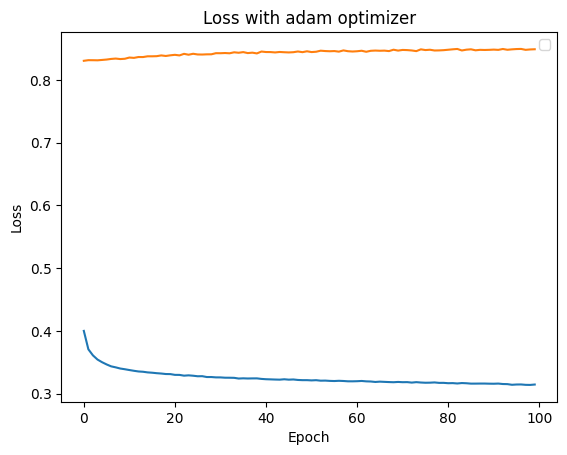

In [51]:
plt.plot(fit.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss with adam optimizer')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


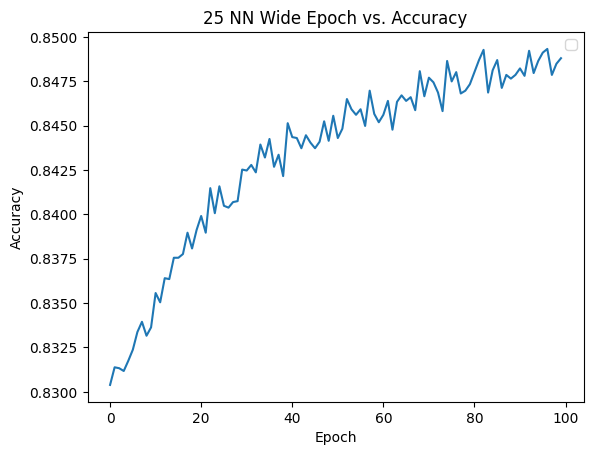

In [52]:
plt.plot(fit.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('25 NN Wide Epoch vs. Accuracy')
plt.legend()
plt.show()

### Tuning the 25W model

In [12]:
fit = modnn25.fit(xtrain, ytrain, epochs = 100, batch_size = 10, validation_split=0.2)
#validaton_split = Float between 0 and 1, fraction of the training data to be used as validation data, i.e. this is the fraction of the given data that will be set apart to evaluate
#the loss at the end of each epoch.  


Epoch 1/100
1530/1530 [==============================] - 2s 1ms/step - loss: 0.3036 - val_loss: 0.3548
Epoch 2/100
1530/1530 [==============================] - 2s 1ms/step - loss: 0.3029 - val_loss: 0.3504
Epoch 3/100
1530/1530 [==============================] - 2s 1ms/step - loss: 0.3023 - val_loss: 0.3898
Epoch 4/100
1530/1530 [==============================] - 2s 1ms/step - loss: 0.3023 - val_loss: 0.3540
Epoch 5/100
1530/1530 [==============================] - 2s 1ms/step - loss: 0.3019 - val_loss: 0.3731
Epoch 6/100
1530/1530 [==============================] - 2s 1ms/step - loss: 0.3018 - val_loss: 0.3644
Epoch 7/100
1530/1530 [==============================] - 2s 1ms/step - loss: 0.3020 - val_loss: 0.3756
Epoch 8/100
1530/1530 [==============================] - 2s 1ms/step - loss: 0.3013 - val_loss: 0.3847
Epoch 9/100
1530/1530 [==============================] - 2s 998us/step - loss: 0.3018 - val_loss: 0.3701
Epoch 10/100
1530/1530 [==============================] - 1s 966us/step

In [35]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

loss = fit.history['loss']
smoothed_loss = smooth_curve(loss)

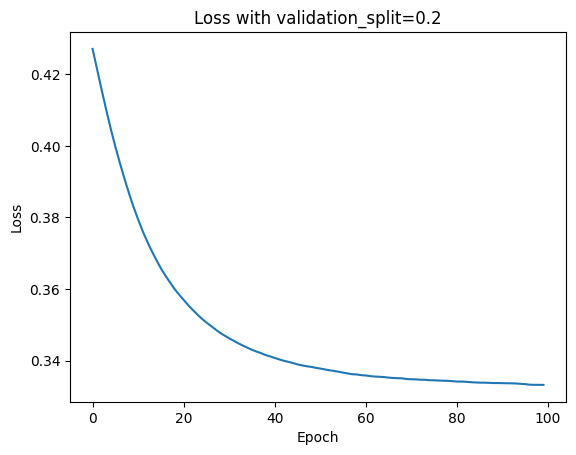

In [37]:
plt.plot(smoothed_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss with validation_split=0.2')
# plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = modnn25.evaluate(x)

### 50 wide model

In [53]:
tf.random.set_seed(6590)

# Define the model
modnn50 = Sequential([
    Dense(units=50, input_shape=(xtrain.shape[1],)),  # Assuming xtrain is your training data
    tf.keras.layers.Activation("relu"),
    Dense(units=1)
])

#Sequential: Allows for models to be created layer by layer in a linear stck
#Dense: Adds a fully connected hidden layer with 25 units. 
###input_shape:  number of features of the input data, i.e. number of columns
##tf.keras.layers.Activation: Simply adds the relu function 
#Dense: Another dense layer of one unit, i.e. the output layer. 


# Compile the model
modnn50.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
#compile: This functionally creates the model after you have defined what it should look like above. 
#optimizer: a way to optimize the alg, adam is good for efficiency and effectiveness in handling large datasets
#loss: loss function - specifies the loss function to minimize. MSE is typical. 

# Print model summary
modnn50.summary()
#param # 325 is (12 features +1) * (25 nodes)
#param # 26 comes from (25 incoming nodes +1) * (1 node in next layer)
#parameters = weights and biases


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 50)                650       
                                                                 
 activation_24 (Activation)  (None, 50)                0         
                                                                 
 dense_33 (Dense)            (None, 1)                 51        
                                                                 
Total params: 701 (2.74 KB)
Trainable params: 701 (2.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
fit = modnn50.fit(xtrain, ytrain, epochs = 100, batch_size = 10, validation_split=0.2)

Epoch 1/100


1530/1530 [==============================] - 2s 1ms/step - loss: 0.3861 - accuracy: 0.8308 - val_loss: 0.5172 - val_accuracy: 0.8237
Epoch 2/100
1530/1530 [==============================] - 1s 900us/step - loss: 0.3563 - accuracy: 0.8304 - val_loss: 0.5149 - val_accuracy: 0.8211
Epoch 3/100
1530/1530 [==============================] - 2s 1ms/step - loss: 0.3446 - accuracy: 0.8320 - val_loss: 0.4975 - val_accuracy: 0.8266
Epoch 4/100
1530/1530 [==============================] - 2s 1ms/step - loss: 0.3378 - accuracy: 0.8330 - val_loss: 0.5413 - val_accuracy: 0.8203
Epoch 5/100
1530/1530 [==============================] - 2s 993us/step - loss: 0.3329 - accuracy: 0.8334 - val_loss: 0.5196 - val_accuracy: 0.8266
Epoch 6/100
1530/1530 [==============================] - 2s 1ms/step - loss: 0.3298 - accuracy: 0.8370 - val_loss: 0.5794 - val_accuracy: 0.8167
Epoch 7/100
1530/1530 [==============================] - 2s 1ms/step - loss: 0.3281 - accuracy: 0.8365 - val_loss: 0.5745 - val_accuracy: 

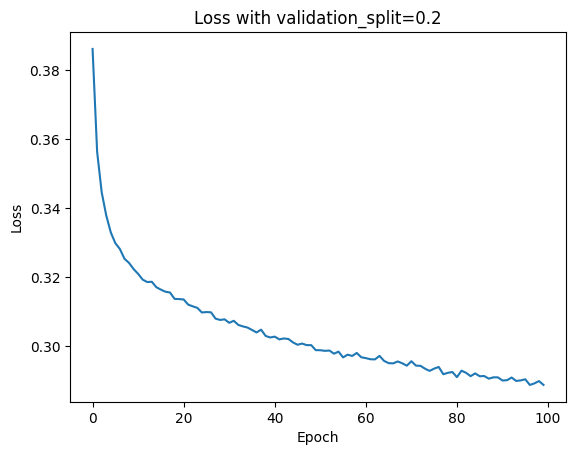

In [55]:
plt.plot(fit.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss with validation_split=0.2')
# plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


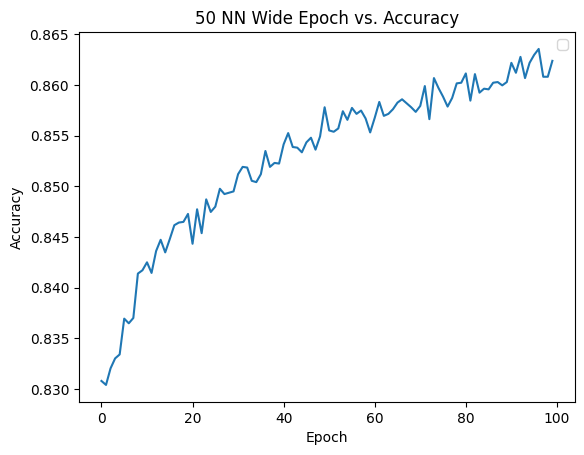

In [56]:
plt.plot(fit.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('50 NN Wide Epoch vs. Accuracy')
plt.legend()
plt.show()

### 5x5 deep model

In [57]:
tf.random.set_seed(6590)

# Define the model
modnn5x5 = Sequential([
    Dense(units=5, input_shape=(xtrain.shape[1],)),  # Assuming xtrain is your training data
    Dropout(0.3), 
    Activation("relu"),
    Dense(units=5),
    Dropout(0.3), 
    Activation("relu"),
    Dense(units=5),
    Dropout(0.3), 
    Activation("relu"),
    Dense(units=5),
    Dropout(0.3), 
    Activation("relu"),
    Dense(units=5),
    Dropout(0.3), 
    Activation("relu"),
    Dense(units=1),
])

#Sequential: Allows for models to be created layer by layer in a linear stck
#Dense: Adds a fully connected hidden layer with 25 units. 
###input_shape:  number of features of the input data, i.e. number of columns
##tf.keras.layers.Activation: Simply adds the relu function 
#Dense: Another dense layer of one unit, i.e. the output layer. 


# Compile the model
modnn5x5.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
#compile: This functionally creates the model after you have defined what it should look like above. 
#optimizer: a way to optimize the alg, adam is good for efficiency and effectiveness in handling large datasets
#loss: loss function - specifies the loss function to minimize. MSE is typical. 

# Print model summary
modnn5x5.summary()
#param # 325 is (12 features +1) * (25 nodes)
#param # 26 comes from (25 incoming nodes +1) * (1 node in next layer)
#parameters = weights and biases

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 5)                 65        
                                                                 
 dropout_5 (Dropout)         (None, 5)                 0         
                                                                 
 activation_25 (Activation)  (None, 5)                 0         
                                                                 
 dense_35 (Dense)            (None, 5)                 30        
                                                                 
 dropout_6 (Dropout)         (None, 5)                 0         
                                                                 
 activation_26 (Activation)  (None, 5)                 0         
                                                                 
 dense_36 (Dense)            (None, 5)                

In [58]:
fit = modnn5x5.fit(xtrain, ytrain, epochs = 100, batch_size = 10, validation_split=0.2)

Epoch 1/100


1530/1530 [==============================] - 3s 1ms/step - loss: 0.4822 - accuracy: 0.8313 - val_loss: 0.4482 - val_accuracy: 0.8285
Epoch 2/100
1530/1530 [==============================] - 2s 1ms/step - loss: 0.4286 - accuracy: 0.8315 - val_loss: 0.4329 - val_accuracy: 0.8285
Epoch 3/100
1530/1530 [==============================] - 2s 1ms/step - loss: 0.4161 - accuracy: 0.8315 - val_loss: 0.4281 - val_accuracy: 0.8285
Epoch 4/100
1530/1530 [==============================] - 2s 2ms/step - loss: 0.4102 - accuracy: 0.8315 - val_loss: 0.4250 - val_accuracy: 0.8285
Epoch 5/100
1530/1530 [==============================] - 3s 2ms/step - loss: 0.4084 - accuracy: 0.8315 - val_loss: 0.4255 - val_accuracy: 0.8285
Epoch 6/100
1530/1530 [==============================] - 3s 2ms/step - loss: 0.4056 - accuracy: 0.8315 - val_loss: 0.4300 - val_accuracy: 0.8285
Epoch 7/100
1530/1530 [==============================] - 2s 996us/step - loss: 0.4103 - accuracy: 0.8315 - val_loss: 0.4271 - val_accuracy: 0.

In [43]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

loss = fit.history['loss']
smoothed_loss = smooth_curve(loss)

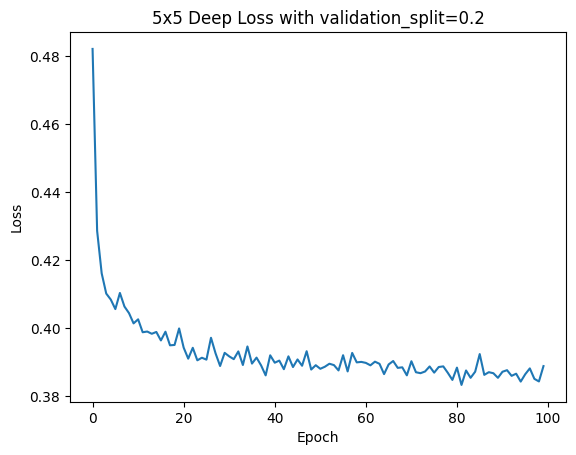

In [59]:
plt.plot(fit.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('5x5 Deep Loss with validation_split=0.2')
# plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


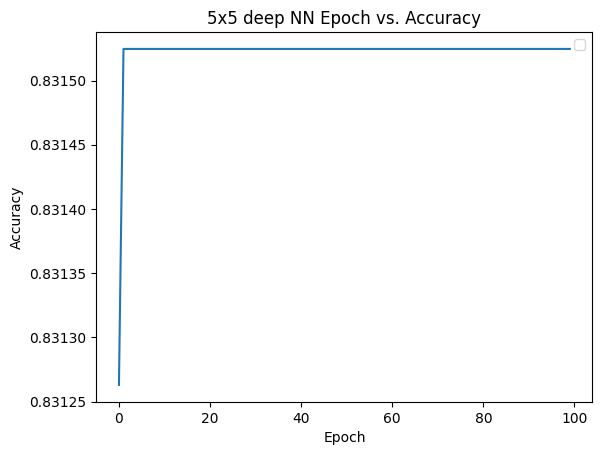

In [60]:
plt.plot(fit.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('5x5 deep NN Epoch vs. Accuracy')
plt.legend()
plt.show()

### 5x10 Deep Model

In [61]:
tf.random.set_seed(6590)

# Define the model
modnn5x10 = Sequential([
    Dense(units=5, input_shape=(xtrain.shape[1],)),  # Assuming xtrain is your training data
    Activation("relu"),
    Dense(units=5),
    Activation("relu"),
    Dense(units=5),
    Activation("relu"),
    Dense(units=5),
    Activation("relu"),
    Dense(units=5),
    Activation("relu"),
    Dense(units=5),
    Activation("relu"),
    Dense(units=5),
    Activation("relu"),
    Dense(units=5),
    Activation("relu"),
    Dense(units=5),
    Activation("relu"),
    Dense(units=5),
    Activation("relu"),
    Dense(units=1),
])

#Sequential: Allows for models to be created layer by layer in a linear stck
#Dense: Adds a fully connected hidden layer with 25 units. 
###input_shape:  number of features of the input data, i.e. number of columns
##tf.keras.layers.Activation: Simply adds the relu function 
#Dense: Another dense layer of one unit, i.e. the output layer. 


# Compile the model
modnn5x10.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
#compile: This functionally creates the model after you have defined what it should look like above. 
#optimizer: a way to optimize the alg, adam is good for efficiency and effectiveness in handling large datasets
#loss: loss function - specifies the loss function to minimize. MSE is typical. 

# Print model summary
modnn5x10.summary()
#param # 325 is (12 features +1) * (25 nodes)
#param # 26 comes from (25 incoming nodes +1) * (1 node in next layer)
#parameters = weights and biases

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 5)                 65        
                                                                 
 activation_30 (Activation)  (None, 5)                 0         
                                                                 
 dense_41 (Dense)            (None, 5)                 30        
                                                                 
 activation_31 (Activation)  (None, 5)                 0         
                                                                 
 dense_42 (Dense)            (None, 5)                 30        
                                                                 
 activation_32 (Activation)  (None, 5)                 0         
                                                                 
 dense_43 (Dense)            (None, 5)                

In [62]:
fit = modnn5x10.fit(xtrain, ytrain, epochs = 100, batch_size = 10, validation_split=0.2)

Epoch 1/100


1530/1530 [==============================] - 3s 1ms/step - loss: 0.4946 - accuracy: 0.8315 - val_loss: 0.4584 - val_accuracy: 0.8285
Epoch 2/100
1530/1530 [==============================] - 2s 1ms/step - loss: 0.4061 - accuracy: 0.8315 - val_loss: 0.4604 - val_accuracy: 0.8285
Epoch 3/100
1530/1530 [==============================] - 2s 1ms/step - loss: 0.3804 - accuracy: 0.8315 - val_loss: 0.4670 - val_accuracy: 0.8285
Epoch 4/100
1530/1530 [==============================] - 3s 2ms/step - loss: 0.3768 - accuracy: 0.8315 - val_loss: 0.4497 - val_accuracy: 0.8285
Epoch 5/100
1530/1530 [==============================] - 3s 2ms/step - loss: 0.3713 - accuracy: 0.8315 - val_loss: 0.4403 - val_accuracy: 0.8285
Epoch 6/100
1530/1530 [==============================] - 2s 1ms/step - loss: 0.3669 - accuracy: 0.8315 - val_loss: 0.4388 - val_accuracy: 0.8285
Epoch 7/100
1530/1530 [==============================] - 2s 1ms/step - loss: 0.3620 - accuracy: 0.8315 - val_loss: 0.4332 - val_accuracy: 0.82

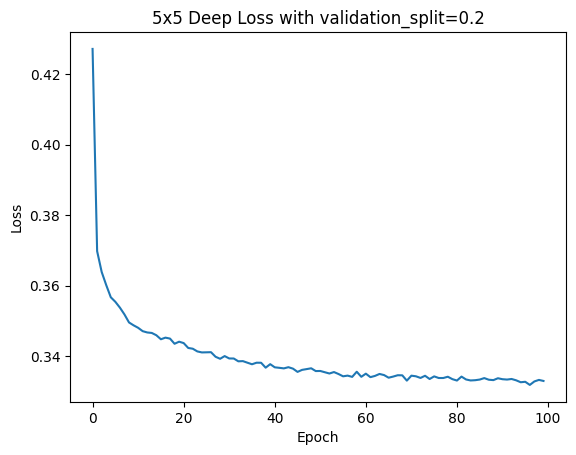

In [34]:
plt.plot(fit.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('5x10 Deep Loss with validation_split=0.2')
# plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


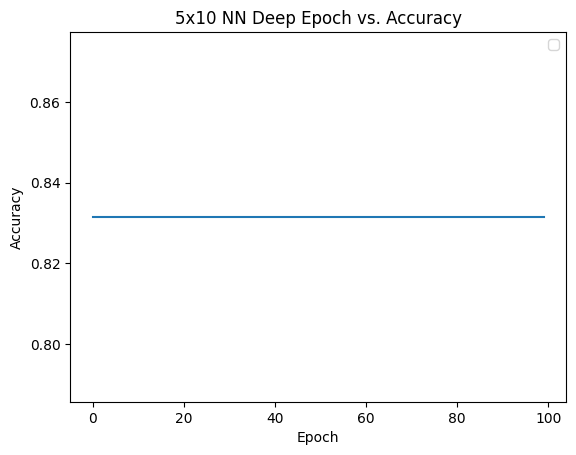

In [63]:
plt.plot(fit.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('5x10 NN Deep Epoch vs. Accuracy')
plt.legend()
plt.show()

### Q5 Comparing to the boosting model

### XG Boost Model Accuracy is:  0.832897489539749. All NN accuracy scores are within that range, although both wide NN's performed about 2% better than XGB. 

### Q6 Plotting Points

In [121]:
prediction = nz05df[['x','y']]
predictions=modnn50.predict(xtest)
prediction['probability'] = predictions
print(prediction)

  1/598 [..............................] - ETA: 10s

598/598 [==============================] - 0s 747us/step
             x        y  probability
0      2567237  6672984     1.078650
1      2535433  6670395   -38.579910
2      2532044  6670216   -15.995006
3      2534514  6670238   -34.108456
4      2535062  6670223   -25.154579
...        ...      ...          ...
19115  2115063  5324545    -4.931053
19116  2116439  5324202   -16.773682
19117  2116264  5323742    -9.485546
19118  2116271  5323285   -31.299612
19119  2116274  5323103   -39.326157

[19120 rows x 3 columns]


/tmp/ipykernel_490773/759692602.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction['probability'] = predictions


In [127]:
prediction['present'] = 1 * (prediction['probability'] > 0.5)
print(prediction)
mask = prediction['present'] == 1
screen = prediction[mask]
print(screen) #just checking to see if the code worked. 
max = prediction['probability'].max()
# print(max)

             x        y  probability  present
0      2567237  6672984     1.078650        1
1      2535433  6670395   -38.579910        0
2      2532044  6670216   -15.995006        0
3      2534514  6670238   -34.108456        0
4      2535062  6670223   -25.154579        0
...        ...      ...          ...      ...
19115  2115063  5324545    -4.931053        0
19116  2116439  5324202   -16.773682        0
19117  2116264  5323742    -9.485546        0
19118  2116271  5323285   -31.299612        0
19119  2116274  5323103   -39.326157        0

[19120 rows x 4 columns]
             x        y  probability  present
0      2567237  6672984     1.078650        1
13     2534968  6666842     4.329948        1
24     2533843  6665868    21.784433        1
25     2571328  6665554    15.809832        1
30     2573049  6664957     3.181609        1
...        ...      ...          ...      ...
19095  2126287  5331030    10.481547        1
19098  2126383  5330758    15.030139        1
19099  2

/tmp/ipykernel_490773/2327093793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction['present'] = 1 * (prediction['probability'] > 0.5)


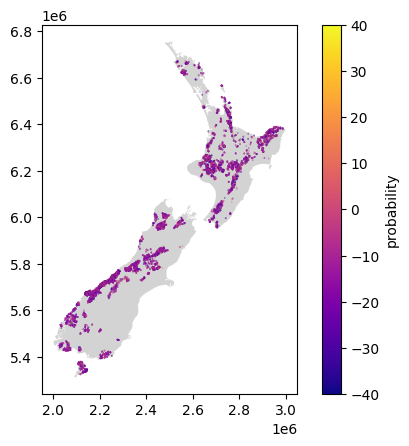

In [141]:

json = 'https://raw.githubusercontent.com/EBIO5460Spring2024/class-materials/main/data/nzpoly.geojson'
nzpoly = gpd.read_file(json)


fig, ax = plt.subplots()
nzpoly.plot(ax=ax, color="lightgray")
scatter = ax.hexbin(prediction['x'], prediction['y'], C=prediction['probability'], gridsize=1500, cmap = 'plasma', vmin=-40, vmax=40)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('probability')
plt.show()

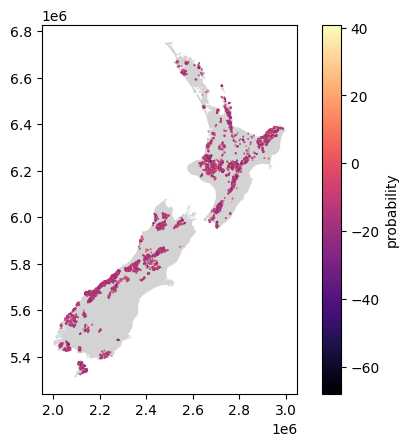

In [139]:
fig, ax = plt.subplots()
nzpoly.plot(ax=ax, color="lightgray")
scatter = ax.hexbin(prediction['x'], prediction['y'], C=prediction['probability'], gridsize=1000, cmap = 'magma')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('probability')
plt.show()


### For some reason, XGBoost outputed 60,000 predictions. NN outputs 19,000. This is why the maps look different.

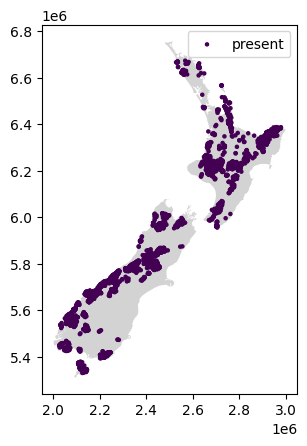

In [92]:
fig, ax = plt.subplots()
nzpoly.plot(ax=ax, color="lightgray")
scatter = ax.scatter(screen['x'], screen['y'], c=screen['present'], cmap = 'viridis', label='present', s=5)
ax.legend()
plt.show()